### 📖Pandas
Open source python library that stands for **Pan**el **Da**ta and is the most popular data analysis library for Python. It is built upon numpy

### 📖Pandas Series
A pandas' basic building unit is the series. A series can hold an array of information organized by an index. On the first sight this is exactly what numpy does, right? Well, pandas builds upon numpy, so it is pretty similar, but unlike a numpy array a pandas dataseries is capable to use a named index besides a numerical index <br>

<div>
<img src="Numpy_Pandas.png" width="500"/>
</div>


In [1]:
import numpy as np
import pandas as pd

How we organized data until now:

In [2]:
#In lists
labels = ["Bochum", "Essen", "Dortmund"]
mylist = [364628, 583109, 587010]

In [23]:
#As arrays
arr_labels = np.array(labels)
print(arr_labels)
arr_pop = np.array(mylist)
arr_pop

<class 'numpy.ndarray'>


array([364628, 583109, 587010])

In [4]:
#In dictionaries
d = {"Bochum": 364628, "Essen": 583109, "Dortmund": 587010}
d

{'Bochum': 364628, 'Essen': 583109, 'Dortmund': 587010}

Lets try to organize it in pandas data series

In [5]:
#This series will only use a numerical index
pd.Series(data=mylist)

0    364628
1    583109
2    587010
dtype: int64

In [25]:
#Lets specify the index
population = pd.Series(mylist, index=labels)
population

Bochum      364628
Essen       583109
Dortmund    587010
dtype: int64

### 📖Selections
The selection of items from a pd series is the same as in dictionaries, exept we are providing an index and not a key (so it is just about naming conventions)

In [7]:
population["Bochum"]

364628

***
### 📖Pandas Dataframe
In a Dataframe each column is a pandas Series <br> 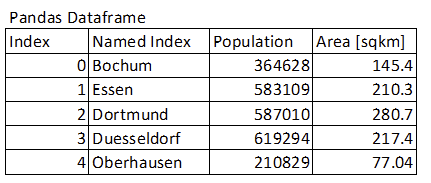

We will create a DataFrame with random numbers to learn how DatFrames work.
We can create DataFrames on many different ways. We can feed it with arrays and lists to provide information about the content, the column names and the row index. It is also possible to provide a dictionary. Pandas can automatically interpret a dictionary and turn it into a DataFrame (we will explore this later).

Lets create a DataFrame based on an array and lists

In [8]:
random_arr = np.random.randn(5,4)
random_arr

array([[ 0.55943375,  1.49873141,  2.46816427, -1.9420235 ],
       [-0.50801152, -1.27248665,  1.0688088 , -1.35101014],
       [ 0.39160055,  1.1440555 , -1.17565102,  1.20184292],
       [-1.54562734,  0.45910817,  2.92937247, -0.08039065],
       [ 0.71431559, -0.44002122, -0.03788539, -1.71118602]])

In [9]:
index = ["A", "B", "C", "D", "E"]
columns = ["W", "X","Y", "Z"]

In [10]:
#Put lists and arrays together  to create a DataFrame
df = pd.DataFrame(data = random_arr, index = index, columns = columns)
df

,W,X,Y,Z
A,0.559434,1.498731,2.468164,-1.942023
B,-0.508012,-1.272487,1.068809,-1.351010
C,0.391601,1.144055,-1.175651,1.201843
D,-1.545627,0.459108,2.929372,-0.080391
E,0.714316,-0.440021,-0.037885,-1.711186


### 📖Select columns from DataFrame

In [32]:
#Lets select a column
print(df['W'])

#And here is the proof that a Dataframe consists of several Series
print(f"The data type of a  single column is {type(df['W'])}")


A    0.559434
B   -0.508012
C    0.391601
D   -1.545627
Name: W, dtype: float64
The data type of a  single column is <class 'pandas.core.series.Series'>
0.5594337511886108


In [35]:
#Select several columns
to_be_selected = ['W', 'Z']
df[to_be_selected]

,W,Z
A,0.559434,-1.942023
B,-0.508012,-1.351010
C,0.391601,1.201843
D,-1.545627,-0.080391


### 📖Select rows from Dataframe
We can select rows by either using the numerical index or the named index

In [13]:
#using the named index:
df.loc['A']

W    0.559434
X    1.498731
Y    2.468164
Z   -1.942023
Name: A, dtype: float64

In [15]:
#select several rows
df.loc[['A', 'B']]

,W,X,Y,Z
A,0.559434,1.498731,2.468164,-1.942023
B,-0.508012,-1.272487,1.068809,-1.351010


In [37]:
#using the numercial index
df.iloc[0]

W    0.559434
X    1.498731
Y    2.468164
Z   -1.942023
Name: A, dtype: float64

### 📖Dataframe slicing

In [41]:
#Selecting several rows
df.iloc[:2] #[2:4]

,W,X,Y,Z
C,0.391601,1.144055,-1.175651,1.201843
D,-1.545627,0.459108,2.929372,-0.080391


In [16]:
df.loc[['A', 'B'], ['Y', 'Z']]

,Y,Z
A,2.468164,-1.942023
B,1.068809,-1.351010


### 📖Add columns to a DataFrame
Columns are added like elements are added to a dictionary. The items of the new column can also be the result of operations

In [17]:
df['New'] = df['X'] + df['Z']
df

,W,X,Y,Z,New
A,0.559434,1.498731,2.468164,-1.942023,-0.443292
B,-0.508012,-1.272487,1.068809,-1.351010,-2.623497
C,0.391601,1.144055,-1.175651,1.201843,2.345898
D,-1.545627,0.459108,2.929372,-0.080391,0.378718
E,0.714316,-0.440021,-0.037885,-1.711186,-2.151207


### 📖Remove columns and rows
Both columns and rows can be removed by using .drop() and calling their index/header. However, we need to specify the axis (axis=0 for rows, axis=1 for columns). Notice that the original DataFrame will not be permanently affected by this operation, unless you specify inplace=True. Alternatively you can store the DataFrame in a new variable

In [18]:
#Drop a column
df.drop('New', axis=1, inplace=True)
df

,W,X,Y,Z
A,0.559434,1.498731,2.468164,-1.942023
B,-0.508012,-1.272487,1.068809,-1.351010
C,0.391601,1.144055,-1.175651,1.201843
D,-1.545627,0.459108,2.929372,-0.080391
E,0.714316,-0.440021,-0.037885,-1.711186


In [19]:
#Drop a row
df.drop('E', axis=0, inplace=True)
df

,W,X,Y,Z
A,0.559434,1.498731,2.468164,-1.942023
B,-0.508012,-1.272487,1.068809,-1.351010
C,0.391601,1.144055,-1.175651,1.201843
D,-1.545627,0.459108,2.929372,-0.080391


### 🧠 This section contains tasks that can be solved with the knowledge from the current notebook.

### ✏️1. Import pandas und NumPy, so you can call them by  an abbreviation

### ✏️2. Create a DataFrame that contains the information shown below

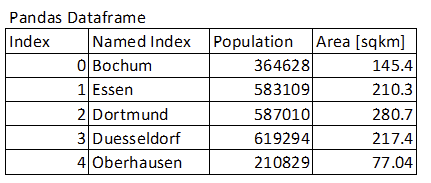

### 💡This section contains solutions for given tasks that could be solved with the knowledge from the current notebook.

### 💡1. Import pandas und NumPy, so you can call them by  an abbreviation

In [ ]:
import pandas as pd
import numpy as np

### 💡2. Create a DataFrame that contains the information shown below

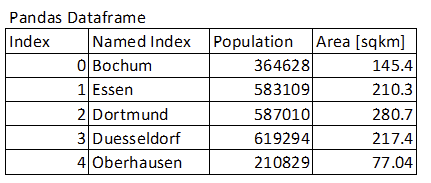

In [ ]:
mydata = {
    'City': ['Bochum', 'Essen', 'Dortmund', 'Duesseldorf', 'Oberhausen'],
    'Population': [364628, 583109, 587010, 619294, 210829],
    'Area_sqkm': [145.4, 210.3, 280.7, 217.4, 77.04]
}
df_pop = pd.DataFrame(mydata)
df_pop

,City,Population,Area_sqkm
0,Bochum,364628,145.40
1,Essen,583109,210.30
2,Dortmund,587010,280.70
3,Duesseldorf,619294,217.40
4,Oberhausen,210829,77.04
